In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
def draw_distplot(col_name):
    class_names=['first','second','third']
    plt.figure(figsize=(12,5))
    for i in range(0,3):
        plt.subplot(1,3,i+1)
        sns.distplot(titanic[titanic.pclass == (i+1)][col_name]
                     , axlabel=class_names[i])
    plt.tight_layout()
    plt.show()
        

C:\Users\Playdata\AppData\Local\Temp\ipykernel_18344\3244412342.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i+1)][col_name]
C:\Users\Playdata\AppData\Local\Temp\ipykernel_18344\3244412342.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclas

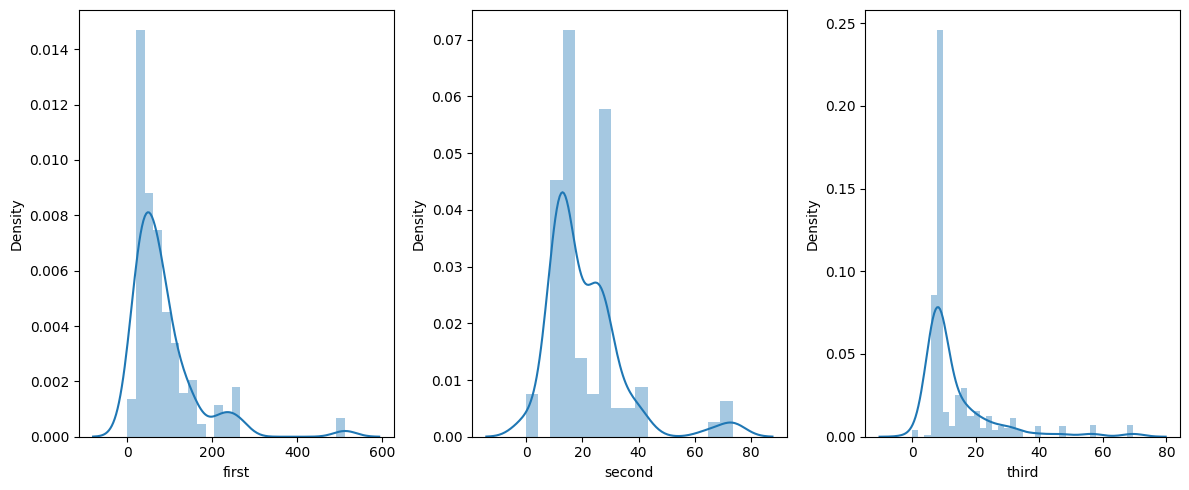

In [5]:
draw_distplot('fare')

In [6]:
print('skew:', round(titanic.fare.skew(),2))
print('kurtosis:', round(titanic.fare.kurt(),2))

# skew랑 kurtosis가 뭔데 
# skew는 왜도 또는 비대칭도 라고도 하며, 평균에 대해
# 최빈값이 얼마나 치우쳐져있는지를 나타내는 척도.
# 우측으로 치우칠수록 음의 값, 좌측 치우칠 양의 값

# kurt는 첨도 = 분포 그래프의 꼬리 부분,
# 분포에 존재하는 이상치의 척도다.
# kurtosis가 높으면, 두꺼운 꼬리(이상치)를 갖고있다는 것.
# 가운데로 뾰족한 모양이됨.


skew: 4.79
kurtosis: 33.4


In [7]:
from sklearn import preprocessing

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  fare_log     891 non-null    float64 
dtypes: bool(2), category(2), float64(3), int64(4), object(5)
memory usage: 87.6+ KB


C:\Users\Playdata\AppData\Local\Temp\ipykernel_18344\3244412342.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i+1)][col_name]
C:\Users\Playdata\AppData\Local\Temp\ipykernel_18344\3244412342.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclas

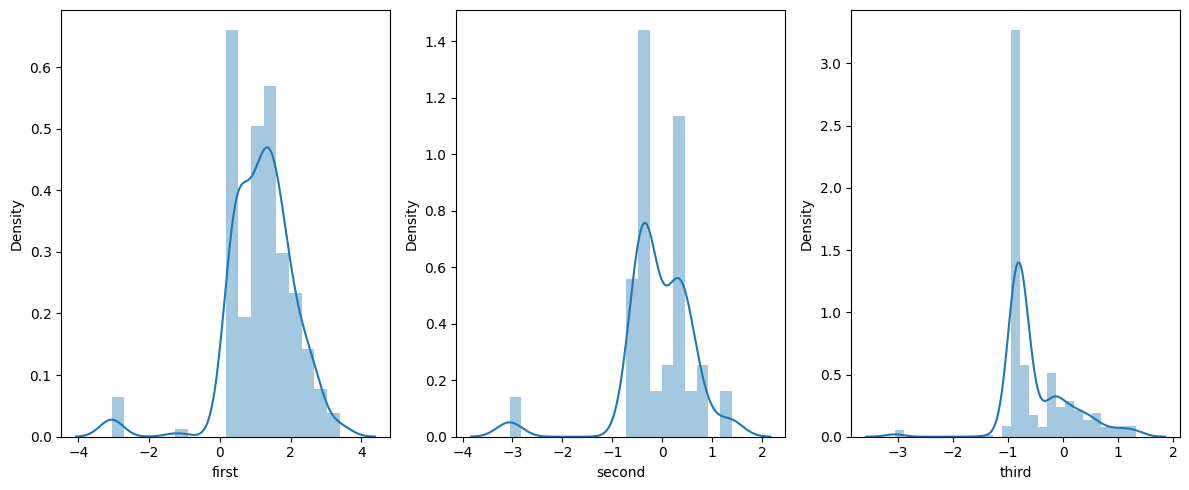

In [12]:
titanic['fare_log'] = preprocessing.scale(np.log(titanic.fare+1))
# preprocessing 패키지 : 스케일링 및 변수변환을 위해 존재.
# 전처리 = preprocess 

# 학습용 데이터를 입력으로 fit 메소드를 실행하면
# 평균값과 표준편차를 계산하여 객체내에 저장.

# transform() 메서드를 실행하면 저장했던 평균값을 빼서
# 새로운 평균값이 0이되도록, 저장한 표준편차로 나누어
# 새로운 표준편차가 1이 되도록 데이터를 '변환'하여 출력
# 1단계와 2단계를 합쳐서 fit_transform()메서드를 실행할 수 있다.

draw_distplot('fare_log')

In [9]:
print( " skew:", round(titanic.fare_log.skew(),2))
print( " kurtosis:", round(titanic.fare_log.kurt(),2))

 skew: 0.39
 kurtosis: 0.98


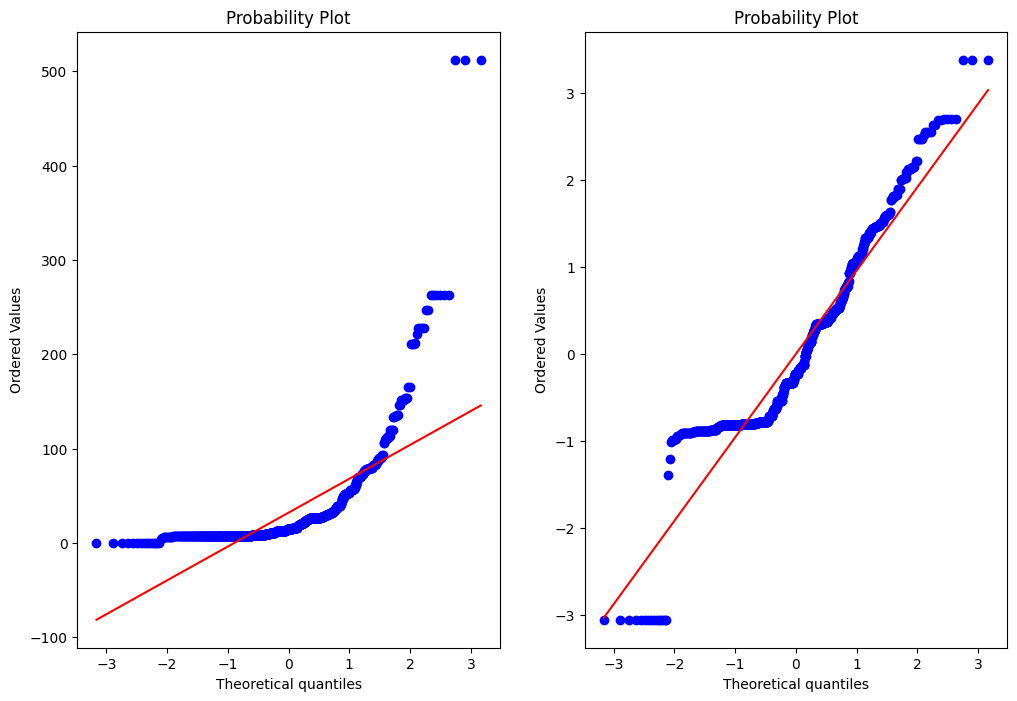

In [10]:
from scipy import stats

# scipy.stats.probplot을 이용해서 주어진 데이터와 정규분포와의
# QQ 플롯을 그릴 수 있다.
# 빨간선에 가까울수록 정규성을 만족한다.
# 정규성이란 정규분포를 따른다는 것.

# 정규성을 띄는지 아닌지를 검증하는 용도로 사용

fig = plt.figure(figsize = (12,8))

fig.add_subplot(1,2,1)
res = stats.probplot(titanic['fare'],plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(titanic['fare_log'],plot=plt)